## Principal Component Analysis

> In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

### 1 Example Dataset

In [2]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
mat = scipy.io.loadmat('data/ex7data1.mat')
plt.figure(figsize=(5,5))
sns.scatterplot(x=mat['X'][:,0], y=mat['X'][:,1])        

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

<Figure size 500x500 with 0 Axes>

### 2.2 Implementing PCA

PCA consists of two computational steps: First, you compute the covariance matrix of the data. Then, you use SVD function to compute the eigenvectors $U1, U2, ... , Un$. These will correspond to the principal components of variation in the data.

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In [25]:
def feature_normalize(X):
    mean = np.mean(X, axis=0)
    X_norm = np.subtract(X,mean)
    
    std = np.std(X_norm, axis=0, ddof=1)
    X_norm = X_norm/std
    return X_norm, mean, std

Covariance matrix: $\Sigma = \frac{1}{m}X^TX$
<br>
SVD computes the principal components.

In [26]:
def pca(X):
    m = X.shape[0]
    covariance_matrix = (1/m) * (X.T.dot(X))
    U, S, _ = np.linalg.svd(covariance_matrix)
    return U, S

In [27]:
X_norm, mu, sigma = feature_normalize(mat['X'])

In [28]:
U, S = pca(X_norm)

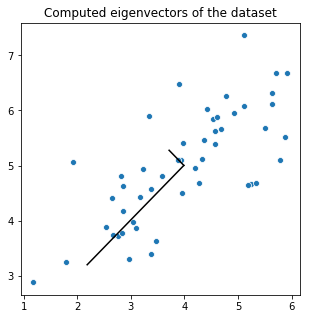

In [29]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=mat['X'][:,0], y=mat['X'][:,1])

p1 = mu
p2 = mu + 1.5 * S[0] * U[:,0].T
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k');  

p1 = mu
p2 = mu + 1.5 * S[1] * U[:,1].T
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k');  
plt.title('Computed eigenvectors of the dataset');

In [30]:
print('Top eigenvector:')
print(' U(:,1) = ', U[0,0], U[1,0])
print('(you should expect to see -0.707107 -0.707107)')

Top eigenvector:
 U(:,1) =  -0.7071067811865472 -0.7071067811865475
(you should expect to see -0.707107 -0.707107)


### 2.3 Dimensionality Reduction with PCA

#### 2.3.1 Projecting the data onto the principal components

In [31]:
def project_data(X, U, K):
    Z = np.zeros((X.shape[0], K))
    for i in range(X.shape[0]):
        x = X[i,:].T
        for j in range(K):
            Z[i,j] = x.T.dot(U[:,j])
    return Z

In [32]:
K=1
Z = project_data(X_norm, U, K)
print('Projection of the first example:', Z[0])
print('(this value should be about 1.481274)')

Projection of the first example: [1.48127391]
(this value should be about 1.481274)


#### 2.3.2 Reconstructing an approximation of the data

In [33]:
def recover_data(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    for i in range(Z.shape[0]):
        z = Z[i,:].T
        for j in range(U.shape[0]):
            X_rec[i,j] = z.T.dot(U[j,:K])
    return X_rec

In [34]:
X_rec = recover_data(Z, U, K)
print('Approximation of the first example:', X_rec[0, 0], X_rec[0, 1])
print('(this value should be about  -1.047419 -1.047419)')

Approximation of the first example: -1.0474188259204957 -1.047418825920496
(this value should be about  -1.047419 -1.047419)


#### 2.3.3 Visualizing the projections

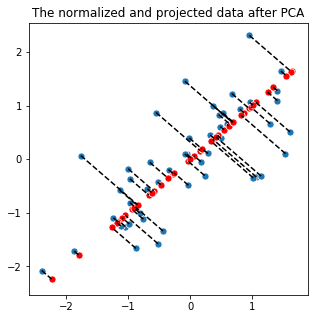

In [35]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=X_norm[:,0], y=X_norm[:,1], s=50)
ax = sns.scatterplot(x=X_rec[:,0], y=X_rec[:,1], color='r', s=50)
for i in range(X_norm.shape[0]):
    p1 = X_norm[i,:]
    p2 = X_rec[i,:]
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], '--k')
plt.title('The normalized and projected data after PCA');

### 2.4 Face Image Dataset

In [36]:
mat = scipy.io.loadmat('data/ex7faces.mat')

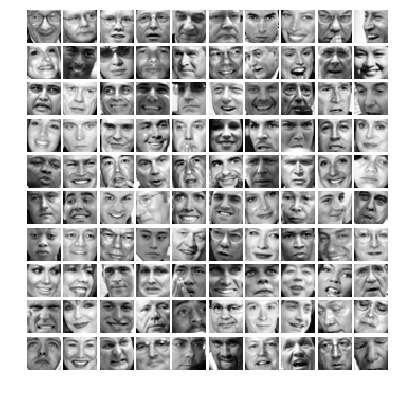

In [37]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
count = 0
for i in range(0,rows):
    for j in range(0,cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(mat['X'][count].reshape(32,32).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

#### 2.4.1 PCA on Faces

In [38]:
X_norm, mu, sigma = feature_normalize(mat['X'])

In [39]:
U, S = pca(X_norm)

In [40]:
U.shape

(1024, 1024)

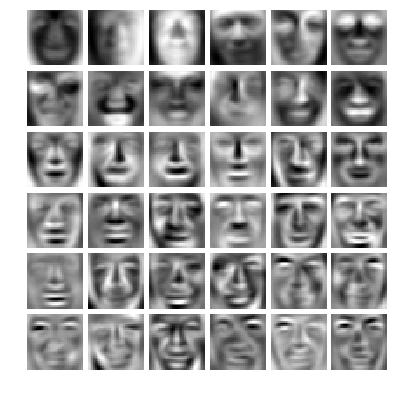

In [41]:
rows = 6
cols = 6
fig = plt.figure(figsize=(5,5))
count = 0
for i in range(rows):
    for j in range(cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(U[:, count].T.reshape(32,32).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

#### 2.4.2 Dimensionality Reduction

In [42]:
K=100
Z = project_data(X_norm, U, K)

In [43]:
print('The projected data Z has a size of: ', Z.shape)

The projected data Z has a size of:  (5000, 100)


Visualizing the reduced dimension faces

In [44]:
X_rec  = recover_data(Z, U, K)

Original:

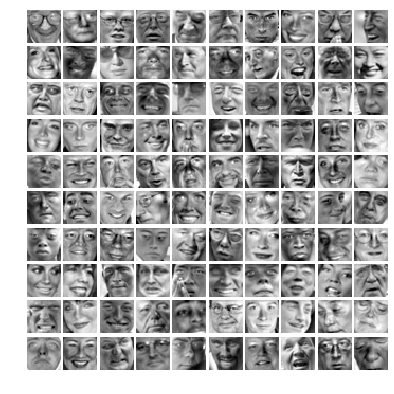

In [45]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
count = 0
for i in range(rows):
    for j in range(cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(X_norm[count].reshape(32,32).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

Reconstructed

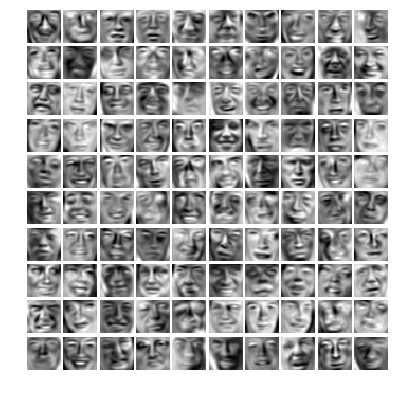

In [46]:
rows = 10
cols = 10
fig = plt.figure(figsize=(5,5))
count = 0
for i in range(rows):
    for j in range(cols):
        ax1 = fig.add_subplot(rows, cols, count+1)
        ax1.imshow(X_rec[count].reshape(32,32).T, cmap='gray')
        ax1.autoscale(False)
        ax1.set_axis_off()
        count+=1
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()

### 2.5 PCA for visualization

In [51]:
img = cv2.imread('data/bird_small.png')

A = img[:,:,::-1]
A = np.divide(img, 255) #get all values in range 0-1

A = A.reshape((A.shape[0]*A.shape[1], 3), order='F')

K = 16
max_iters = 10
initial_centroids = init_random_centroids(A, K)
centroids, idx = kmeans(A, initial_centroids, max_iters, False)

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


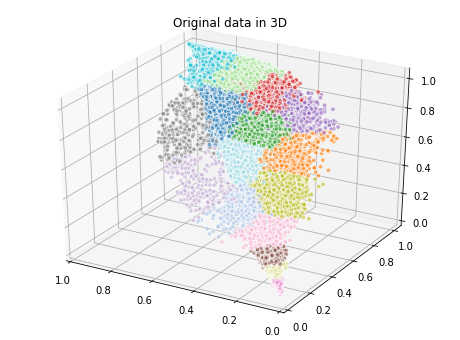

In [61]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(A[:,0], A[:,1], A[:,2], alpha=0.6, edgecolors='w', c=idx.ravel(), cmap=plt.get_cmap("tab20"))
ax.set_xlim(1, 0)

plt.title('Original data in 3D');
plt.show()

In [57]:
X_norm, mu, sigma = feature_normalize(A)
U, S = pca(X_norm)
Z = project_data(X_norm, U, 2)

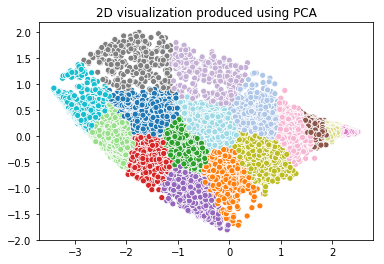

In [58]:
sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=idx.ravel(), legend=False, palette=plt.get_cmap("tab20"))
plt.title('2D visualization produced using PCA');